# Z01 pipeline with polus-plugins API - Version 0.1.0

### Instructions for use

1. Open a terminal (or use VScode built in terminal) and cd (change directory) into a directory of your choosing
2. Clone the polus-plugins github repo with polus-plugins API support
    - `git clone https://github.com/camilovelezr/polus-plugins.git`
    - `git fetch origin io2` # this might change in the future
    - `git checkout io2`
3. From the terminal change directory into the repo
    - `cd polus-plugins`
4. Create a python environment using conda or miniconda (or use any other method you prefer) - installation instructions for miniconda can be found here: https://conda.io/projects/conda/en/stable/user-guide/install/index.html#regular-installation. Note these instructions assume that conda is a system PATH environment variable, this will happen automatically on Linux and MacOS but not on Windows. If using Windows you have 3 options: add conda as a system environment variable OR use the anaconda shell OR (recommended) use WSL (Windows Subsystem for Linux) - this is the method I use for my local development.
    - `conda create -n polus-plugins python`
    - Here `polus-plugins` is just a name for the python environment but this can be any name you choose  
5. Activate the polus-plugins python environment
    - `conda activate polus-plugins`
6. Install the polus-plugins requirements
    - `pip install -r requirements.txt`
7. Install ipykernel
    - `conda install ipykernel`
8. If using VSCode you can now open the polus-plugins directory with VSCode and it will automatically detect the python environment allowing you to select the environment as a kernel. **Note you may need to install the Jupyter extension for VSCode. If you are not using VSCode you may need to manually install the kernel. I can assist with this if needed.**
- in windows, want wsl extension; in wsl - want jupyter and python
- select polus plugins environment in the upper right.
9. Place this file `z01.ipynb` into the polus-plugins directory as a top level file.
    - For example on my machine it has the following path `/home/ben/polus-plugins/z01.ipynb`
10. In the top right corner of VSCode select the polus-plugins kernel
11. Enter the full path to your input data
    - `inp_dir = Path('/home/ben/rpe/fluorescent/images/')`
12. For the last plugin `nyxus` you will have to specify `pixelPerMicron` as per your dataset. This can be obtained using tiffinfo: https://linux.die.net/man/1/tiffinfo 
    - `nyxus.pixelPerMicron = 0.83612`
13. You are now ready to run each cell

The way this notebook is currently configured it will only extract information from a single channel. However, if you have multiple channels of interest this can easily be changed by modifying which directories the data is in and by changing some of the file patterns.

The data used for this example can be found here:
https://isg.nist.gov/deepzoomweb/data/RPEimplants (Z01 fluorescent images)

In [1]:
import os
import shutil
import polus.plugins
from polus.plugins import plugins
from pathlib import Path
from pprint import pprint
import filepattern
from bfio import BioReader, BioWriter
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Define input directory
img_dir = Path('./data/fluorescentZ01-full/')
inp_dir = Path('./data/fluorescentZ01-subset/input/')
assert img_dir.exists(), "The image directory does not exist"
assert inp_dir.exists(), "The input directory does not exist"
# intensity image file naming convention: possible vars: x, y, z, t, c

In [3]:
files = list(img_dir.iterdir())
assert img_dir.exists(), "The input directory does not exist"
files.sort()
print('The number of input images is {}'.format(len(files)))
print('\nThe first 5 images:')
pprint(files[:5])
print('\nThe last 5 images:')
pprint(files[-5:])

The number of input images is 1032

The first 5 images:
[PosixPath('data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n100_r2201_c1001.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n102_r2201_c1401.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n103_r2201_c1601.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n104_r2201_c1801.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n105_r2201_c2201.ome.tif')]

The last 5 images:
[PosixPath('data/fluorescentZ01-full/20161117-D2B-D75_Med_c1_ORG_n991_r201_c201.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161117-D2B-D75_Med_c1_ORG_n992_r201_c401.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161117-D2B-D75_Med_c1_ORG_n993_r201_c601.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161117-D2B-D75_Med_c1_ORG_n994_r201_c801.ome.tif'),
 PosixPath('data/fluorescentZ01-full/20161117-D2B-D75_Med_c1_ORG_n995_r201_c1001.ome.tif')]


In [29]:
# This cell copies the first 5 files to make a subset and renames to comform
# with filepattern 1

for src in files[:5]:
    name = src.name[24:]
    dest = inp_dir.joinpath(name)
    print(src, '>>>', dest)
    shutil.copy(src, dest)

data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n100_r2201_c1001.ome.tif >>> data/fluorescentZ01-subset/input/ORG_n100_r2201_c1001.ome.tif
data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n102_r2201_c1401.ome.tif >>> data/fluorescentZ01-subset/input/ORG_n102_r2201_c1401.ome.tif
data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n103_r2201_c1601.ome.tif >>> data/fluorescentZ01-subset/input/ORG_n103_r2201_c1601.ome.tif
data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n104_r2201_c1801.ome.tif >>> data/fluorescentZ01-subset/input/ORG_n104_r2201_c1801.ome.tif
data/fluorescentZ01-full/20161012-D3C-D73_Med_c1_ORG_n105_r2201_c2201.ome.tif >>> data/fluorescentZ01-subset/input/ORG_n105_r2201_c2201.ome.tif


In [4]:
manifests = [
    'https://raw.githubusercontent.com/bthoughton/polus-plugins/tiledtiff/formats/polus-tiledtiff-converter-plugin/plugin.json',
    'https://raw.githubusercontent.com/bthoughton/polus-plugins/update/zo1/segmentation/polus-zo1-segmentation-plugin/plugin.json',
    'https://raw.githubusercontent.com/Nicholas-Schaub/polus-plugins/update/binops/transforms/images/binary-operations-plugin/plugin.json',
    'https://raw.githubusercontent.com/bthoughton/polus-plugins/ftl/feat/binarization-threshold/transforms/images/polus-ftl-label-plugin/plugin.json',
    'https://raw.githubusercontent.com/hamshkhawar/polus-plugins/scaled-nyxus/features/nyxus-plugin/plugin.json'
]

In [6]:
for url in manifests:
    polus.plugins.submit_plugin(url, refresh=True)
    
print(plugins.list)

['BinaryOperationsPlugin', 'FtlLabel', 'NyxusPlugin', 'OmeTiledTiffConverter', 'Zo1BorderSegmentation']


In [8]:
# Create the output directories
out_dir = {}
parent_out_dir = inp_dir.parent
workflow = [
    'OmeTiledTiffConverter',
    'Zo1BorderSegmentation',
    'BinaryOperationsPlugin-invert',
    'FtlLabel',
    'BinaryOperationsPlugin-removeLarge',
    'FtlLabel',
    'NyxusPlugin'
    ]

if not parent_out_dir.exists():
    os.mkdir(parent_out_dir)

for name in workflow:
    out_dir[name] = parent_out_dir.joinpath(name)
    if out_dir[name].exists():
        continue
        ### CAUTION THE LINE BELOW PERMANENTLY DELETES OLD OUT DIRECTORIES IF UNCOMMENTED
        #shutil.rmtree(out_dir[name])
    elif name :
        os.mkdir(out_dir[name])
    
pprint(out_dir)

{'BinaryOperationsPlugin-invert': PosixPath('data/fluorescentZ01-subset/BinaryOperationsPlugin-invert'),
 'BinaryOperationsPlugin-removeLarge': PosixPath('data/fluorescentZ01-subset/BinaryOperationsPlugin-removeLarge'),
 'FtlLabel': PosixPath('data/fluorescentZ01-subset/FtlLabel'),
 'NyxusPlugin': PosixPath('data/fluorescentZ01-subset/NyxusPlugin'),
 'OmeTiledTiffConverter': PosixPath('data/fluorescentZ01-subset/OmeTiledTiffConverter'),
 'Zo1BorderSegmentation': PosixPath('data/fluorescentZ01-subset/Zo1BorderSegmentation')}


In [9]:
# Define the plugins
ome = plugins.OmeTiledTiffConverter
z01 = plugins.Zo1BorderSegmentation
binary = plugins.BinaryOperationsPlugin
ftl = plugins.FtlLabel
nyxus = plugins.NyxusPlugin


28-Feb-23 18:10:50 - polus.plugins - WARNING  - The plugin (Binary Operations Plugin) is missing the author field. This field is not required but should be filled in.


In [10]:
# Take a look at what the plugin expects
[inp.name for inp in ome.inputs + ome.outputs]

['input', 'output']

In [11]:
ome.input = inp_dir
ome.output = out_dir['OmeTiledTiffConverter']

In [36]:
# If you have gpu capability you can also run this without the gpus kwarg 
ome.run(gpus=None)

28-Feb-23 17:44:16 - polus.plugins - INFO     - Running container without GPU. Plugin version 1.1.0
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: argument length=4
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: args[0]:--input
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: args[1]:/data/inputs/input0
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: args[2]:--output
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: args[3]:/data/outputs/output0
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: inputFileDir=/data/inputs/input0
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: outputFileDir=/data/outputs/output0
Feb 28, 2023 5:44:17 PM axle.polus.wipp.plugins.TiledOmeTiffConverterMain main
INFO: tileSizeXPix=1024
Feb 28, 2023 5:44:17 PM 

In [12]:
# Take a look at what the plugin expects
[inp.name for inp in z01.inputs + z01.outputs]

['inpDir', 'outDir']

In [13]:
z01.inpDir = out_dir['OmeTiledTiffConverter']
z01.outDir = out_dir['Zo1BorderSegmentation']

for inp in z01.inputs + z01.outputs:
    print('{} = {}'.format(inp.name, inp.value))

inpDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/OmeTiledTiffConverter
outDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/Zo1BorderSegmentation


In [39]:
z01.run(gpus=None)

28-Feb-23 17:44:32 - polus.plugins - INFO     - Running container without GPU. Plugin version 0.2.0
28-Feb-23 17:44:35 - main     - INFO     - Parsing arguments...
28-Feb-23 17:44:35 - main     - INFO     - inpDir = /data/inputs/input0
28-Feb-23 17:44:35 - main     - INFO     - outDir = /data/outputs/output0
28-Feb-23 17:44:35 - tensorflow - WARNING  - SavedModel saved prior to TF 2.5 detected when loading Keras model. Please ensure that you are saving the model with model.save() or tf.keras.models.save_model(), *NOT* tf.saved_model.save(). To confirm, there should be a file named "keras_metadata.pb" in the SavedModel directory.
28-Feb-23 17:44:40 - tensorflow - WARNING  - No training configuration found in save file, so the model was *not* compiled. Compile it manually.
28-Feb-23 17:44:40 - main     - INFO     - Segmenting: ORG_n100_r2201_c1001.ome.ome.tif
28-Feb-23 17:44:53 - main     - INFO     - Segmenting: ORG_n102_r2201_c1401.ome.ome.tif
28-Feb-23 17:45:06 - main     - INFO     -

In [14]:
[inp.name for inp in binary.inputs + binary.outputs]

['inpDir',
 'filePattern',
 'kernel',
 'operation',
 'shape',
 'threshold',
 'iterations',
 'outDir']

In [15]:
binary_fp = filepattern.infer_pattern(list(out_dir['Zo1BorderSegmentation'].iterdir()))
binary_fp

'ORG_n10{r}_r2201_c{tt}01.ome.ome.tif'

In [16]:
binary.inpDir = out_dir['Zo1BorderSegmentation']
binary.filePattern = binary_fp
# binary.kernelSize = 9
binary.operation = 'invert'
# binary.shape = 'ellipse'
binary.outDir = out_dir['BinaryOperationsPlugin-invert']

for inp in binary.inputs + binary.outputs:
    print('{} = {}'.format(inp.name, inp.value))

inpDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/Zo1BorderSegmentation
filePattern = ORG_n10{r}_r2201_c{tt}01.ome.ome.tif
kernel = None
operation = operation.invert
shape = None
threshold = None
iterations = None
outDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/BinaryOperationsPlugin-invert


In [15]:
binary.run(gpus=None)

28-Feb-23 17:54:35 - polus.plugins - INFO     - Running container without GPU. Plugin version 0.5.0-dev1
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - version: 0.5.0-dev0
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - filePattern = ORG_n10{r}_r2201_c{tt}01.ome.ome.tif
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - inpDir = /data/inputs/input0
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - outDir = /data/outputs/output0
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - operation = invert
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - shape = ellipse
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - kernel = 3
28-Feb-23 17:54:37 - polus.plugins.transforms.images.binary_operations - INFO     - threshold = 0
28-Feb-23 17:54:37 - polus.plugi

The recommended pattern to use is: ORG_n10{r:d}_r2201_c{t:dd}01.ome.ome.tif. See the documentation for details about the new style.


In [17]:
[inp.name for inp in ftl.inputs + ftl.outputs]

['inpDir', 'connectivity', 'binarizationThreshold', 'outDir']

In [18]:
ftl.inpDir = out_dir['BinaryOperationsPlugin-invert'] # change to removeSmall later
ftl.connectivity = 1
ftl.binarizationThreshold = 0
ftl.outDir = out_dir['FtlLabel']

for inp in ftl.inputs + ftl.outputs:
    print('{} = {}'.format(inp.name, inp.value))

inpDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/BinaryOperationsPlugin-invert
connectivity = 1
binarizationThreshold = 0.0
outDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/FtlLabel


In [18]:
ftl.run(gpus=None)

28-Feb-23 17:55:33 - polus.plugins - INFO     - Running container without GPU. Plugin version 0.3.11


Unable to find image 'polusai/ftl-label-plugin:0.3.11' locally
0.3.11: Pulling from polusai/ftl-label-plugin
e9995326b091: Pulling fs layer
f3d7f077cdde: Pulling fs layer
0db71afa16f3: Pulling fs layer
6f0b5905c60c: Pulling fs layer
9d2154d50fd1: Pulling fs layer
1f0a857ba549: Pulling fs layer
767189ff8587: Pulling fs layer
f479ee3c608e: Pulling fs layer
5037e97ac6c4: Pulling fs layer
733f8f271a11: Pulling fs layer
4f4fb700ef54: Pulling fs layer
9d1a8b803970: Pulling fs layer
6f0b5905c60c: Waiting
9d2154d50fd1: Waiting
1f0a857ba549: Waiting
767189ff8587: Waiting
f479ee3c608e: Waiting
5037e97ac6c4: Waiting
733f8f271a11: Waiting
4f4fb700ef54: Waiting
9d1a8b803970: Waiting
f3d7f077cdde: Verifying Checksum
f3d7f077cdde: Download complete
6f0b5905c60c: Verifying Checksum
6f0b5905c60c: Download complete
0db71afa16f3: Verifying Checksum
0db71afa16f3: Download complete
9d2154d50fd1: Verifying Checksum
9d2154d50fd1: Download complete
e9995326b091: Verifying Checksum
e9995326b091: Download compl

28-Feb-23 17:56:21 - main     - INFO     - Parsing arguments...
28-Feb-23 17:56:21 - main     - INFO     - inpDir = /data/inputs/input0
28-Feb-23 17:56:21 - main     - INFO     - connectivity = 1
28-Feb-23 17:56:21 - main     - INFO     - binarizationThreshold = 0.0
28-Feb-23 17:56:21 - main     - INFO     - outDir = /data/outputs/output0
28-Feb-23 17:56:21 - main     - INFO     - processing 5 images in total...
28-Feb-23 17:56:21 - main     - INFO     - processing 5 small images with cython...
28-Feb-23 17:56:21 - main     - INFO     - processing 0 large images with rust
/ftl-rust/src/main.py:113: DeprecationWarning: in the future the `.dtype` attribute of a given datatype object must be a valid dtype instance. `data_type.dtype` may need to be coerced using `np.dtype(data_type.dtype)`. (Deprecated NumPy 1.20)
  labels = ftl.label_nd(image, connectivity)
28-Feb-23 17:56:21 - main     - INFO     - 100.00% complete


In [40]:
binary_fp = filepattern.infer_pattern([f for f in out_dir['FtlLabel'].iterdir()])

In [41]:
binary.inpDir = out_dir['FtlLabel']
binary.filePattern = binary_fp
binary.operation = 'removeLarge'
binary.threshold = 1000
binary.outDir = out_dir['BinaryOperationsPlugin-removeLarge']

for inp in binary.inputs + binary.outputs:
    print('{} = {}'.format(inp.name, inp.value))

inpDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/FtlLabel
filePattern = ORG_n10{r}_r2201_c{tt}01.ome.tif
kernel = None
operation = operation.removeLarge
shape = None
threshold = 1000
iterations = None
outDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/BinaryOperationsPlugin-removeLarge


In [42]:
binary.run(gpus=None)

28-Feb-23 18:22:42 - polus.plugins - INFO     - Running container without GPU. Plugin version 0.5.0-dev1
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - version: 0.5.0-dev0
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - filePattern = ORG_n10{r}_r2201_c{tt}01.ome.tif
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - inpDir = /data/inputs/input0
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - outDir = /data/outputs/output0
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - operation = removeLarge
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - shape = ellipse
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - kernel = 3
28-Feb-23 18:22:43 - polus.plugins.transforms.images.binary_operations - INFO     - threshold = 1000
28-Feb-23 18:22:43 - polus.p

The recommended pattern to use is: ORG_n10{r:d}_r2201_c{t:dd}01.ome.tif. See the documentation for details about the new style.


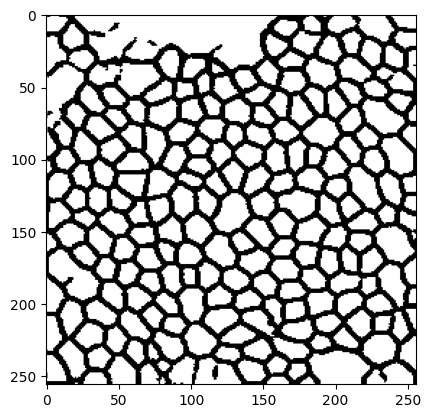

In [43]:
# Take a look at an image before labeling
before_label = list(out_dir['BinaryOperationsPlugin-invert'].iterdir())[0]

with BioReader(before_label) as br:
    img = br[:]
    meta = br.metadata

plt.imshow(img, cmap='gray')

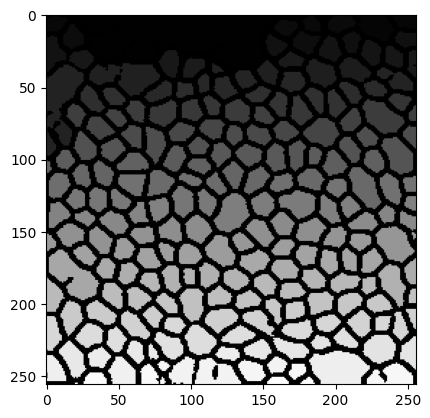

In [44]:
# Take a look at an image after labeling
after_label = list(out_dir['FtlLabel'].iterdir())[0]

with BioReader(after_label) as br:
    img = br[:]
    meta = br.metadata

plt.imshow(img, cmap='gray')

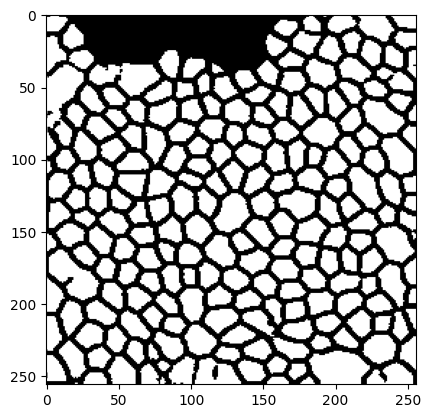

In [45]:
# Take a look at an image after removing large objects
after_large = list(out_dir['BinaryOperationsPlugin-removeLarge'].iterdir())[0]

with BioReader(after_large) as br:
    img = br[:]
    meta = br.metadata

# remove labeling just for visualization
img[img>0] = 1

plt.imshow(img, cmap='gray')

In [46]:
[inp.name for inp in nyxus.inputs + nyxus.outputs]

['inpDir',
 'segDir',
 'intPattern',
 'segPattern',
 'features',
 'neighborDist',
 'pixelPerMicron',
 'outDir']

In [47]:
int_fp = filepattern.infer_pattern(list(out_dir['OmeTiledTiffConverter'].iterdir()))
print(int_fp)

ORG_n10{r}_r2201_c{tt}01.ome.ome.tif


In [48]:
seg_fp = filepattern.infer_pattern(list(out_dir['BinaryOperationsPlugin-removeLarge'].iterdir()))
print(seg_fp)

ORG_n10{r}_r2201_c{tt}01.ome.tif


In [49]:
nyxus.inpDir = out_dir['OmeTiledTiffConverter']
nyxus.segDir = out_dir['BinaryOperationsPlugin-removeLarge']
nyxus.features = 'ALL_MORPHOLOGY'
nyxus.intPattern = int_fp
nyxus.segPattern = seg_fp
nyxus.neighborDist = 5
nyxus.pixelPerMicron = 0.83612 # for z01 images
nyxus.outDir = out_dir['NyxusPlugin']

for inp in nyxus.inputs + nyxus.outputs:
    print('{} = {}'.format(inp.name, inp.value))

inpDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/OmeTiledTiffConverter
segDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/BinaryOperationsPlugin-removeLarge
intPattern = ORG_n10{r}_r2201_c{tt}01.ome.ome.tif
segPattern = ORG_n10{r}_r2201_c{tt}01.ome.tif
features = ALL_MORPHOLOGY
neighborDist = 5.0
pixelPerMicron = 0.83612
outDir = /home/ben/polus-plugins/data/fluorescentZ01-subset/NyxusPlugin


In [50]:
nyxus.run(gpus=None)

28-Feb-23 18:24:20 - polus.plugins - INFO     - Running container without GPU. Plugin version 0.1.3


Unable to find image 'polusai/nyxus-plugin:0.1.3' locally
0.1.3: Pulling from polusai/nyxus-plugin
3b65ec22a9e9: Already exists
09b5d8ab03ec: Already exists
c819842e0717: Already exists
33007e83289d: Already exists
ca2e67a33670: Already exists
3195bab2e333: Already exists
16a1d28ca19d: Pulling fs layer
db03266cf60f: Pulling fs layer
abc1a5b2e0d8: Pulling fs layer
4f4fb700ef54: Pulling fs layer
a6d1d777b3d9: Pulling fs layer
4f4fb700ef54: Waiting
a6d1d777b3d9: Waiting
16a1d28ca19d: Download complete
db03266cf60f: Verifying Checksum
db03266cf60f: Download complete
abc1a5b2e0d8: Verifying Checksum
abc1a5b2e0d8: Download complete
16a1d28ca19d: Pull complete
4f4fb700ef54: Verifying Checksum
4f4fb700ef54: Download complete
db03266cf60f: Pull complete
abc1a5b2e0d8: Pull complete
4f4fb700ef54: Pull complete
a6d1d777b3d9: Verifying Checksum
a6d1d777b3d9: Download complete
a6d1d777b3d9: Pull complete
Digest: sha256:87e19e96c36876cb2ae0d03375b370de2e90b1f163aa0ca5bc37f84905b8c92e
Status: Download

28-Feb-23 18:24:25 - main     - INFO     - Parsing arguments...
28-Feb-23 18:24:25 - main     - INFO     - inpDir = /data/inputs/input0
28-Feb-23 18:24:25 - main     - INFO     - segDir = /data/inputs/input1
28-Feb-23 18:24:25 - main     - INFO     - intPattern = ORG_n10{r}_r2201_c{tt}01.ome.ome.tif
28-Feb-23 18:24:25 - main     - INFO     - segPattern = ORG_n10{r}_r2201_c{tt}01.ome.tif
28-Feb-23 18:24:25 - main     - INFO     - features = ALL_MORPHOLOGY
28-Feb-23 18:24:25 - main     - INFO     - neighborDist = 5.0
28-Feb-23 18:24:25 - main     - INFO     - pixelPerMicron = 0.83612
28-Feb-23 18:24:25 - main     - INFO     - outDir = /data/outputs/output0
28-Feb-23 18:24:25 - Nyxus    - INFO     - Processes 100.00% complete
